In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv ("EV Sales.csv")

In [3]:
df.tail(6)

,region,category,parameter,mode,powertrain,year,unit,value
3792,World,Historical,EV sales,Cars,FCEV,2023,Vehicles,8900.0
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,28000000.0
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9500000.0
3795,World,Historical,EV sales share,Cars,EV,2023,percent,18.0
3796,World,Historical,EV stock share,Cars,EV,2023,percent,3.2
3797,World,Historical,Electricity demand,Cars,EV,2023,GWh,97000.0


In [4]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of          region    category           parameter  mode powertrain  year  \
0     Australia  Historical            EV sales  Cars        BEV  2011   
1     Australia  Historical      EV stock share  Cars         EV  2011   
2     Australia  Historical      EV sales share  Cars         EV  2011   
3     Australia  Historical            EV stock  Cars        BEV  2011   
4     Australia  Historical            EV stock  Cars        BEV  2012   
...         ...         ...                 ...   ...        ...   ...   
3793      World  Historical            EV stock  Cars        BEV  2023   
3794      World  Historical            EV sales  Cars        BEV  2023   
3795      World  Historical      EV sales share  Cars         EV  2023   
3796      World  Historical      EV stock share  Cars         EV  2023   
3797      World  Historical  Electricity demand  Cars         EV  2023   

          unit         value  
0     Vehicles  4.900000e+01  
1      percent 

In [6]:
df.shape

(3798, 8)

<Axes: xlabel='year', ylabel='count'>

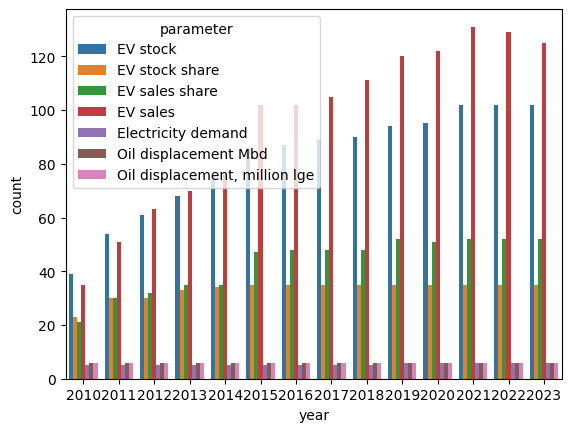

In [7]:
sb.countplot(x="year",hue="parameter",data=df)

In [8]:
df_cat=df.select_dtypes(include=object)

In [9]:
df_cat.head()

,region,category,parameter,mode,powertrain,unit
0,Australia,Historical,EV sales,Cars,BEV,Vehicles
1,Australia,Historical,EV stock share,Cars,EV,percent
2,Australia,Historical,EV sales share,Cars,EV,percent
3,Australia,Historical,EV stock,Cars,BEV,Vehicles
4,Australia,Historical,EV stock,Cars,BEV,Vehicles


In [10]:
df_num=df.select_dtypes(include=[np.number])

In [11]:
df_num.head()

,year,value
0,2011,49.00000
1,2011,0.00039
2,2011,0.00650
3,2011,49.00000
4,2012,220.00000


In [12]:
df1 = df[(df["unit"] != "percent") &  
         (df["parameter"] != "Electricity demand") &  
         (df["parameter"] != "Oil displacement Mbd") &  
         (df["parameter"] != "Oil displacement, million lge")]  # Keeps rows where 'unit' is NOT 'percent'

In [13]:
df1.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0
6,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0


In [14]:
df2 = df[(df["unit"] != "Vehicles") & 
         (df["parameter"] != "Electricity demand") & 
         (df["parameter"] != "Oil displacement Mbd") & 
         (df["parameter"] != "Oil displacement, million lge")]

In [15]:
df2.head()

,region,category,parameter,mode,powertrain,year,unit,value
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
7,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
8,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
11,Australia,Historical,EV stock share,Cars,EV,2013,percent,0.00460


In [16]:
df1_cat = df1.select_dtypes(include=object)

In [17]:
df2_cat = df2.select_dtypes(include=object)

In [18]:
df1_cat.head()

,region,category,parameter,mode,powertrain,unit
0,Australia,Historical,EV sales,Cars,BEV,Vehicles
3,Australia,Historical,EV stock,Cars,BEV,Vehicles
4,Australia,Historical,EV stock,Cars,BEV,Vehicles
5,Australia,Historical,EV stock,Cars,PHEV,Vehicles
6,Australia,Historical,EV sales,Cars,PHEV,Vehicles


In [19]:
df2_cat.head()

,region,category,parameter,mode,powertrain,unit
1,Australia,Historical,EV stock share,Cars,EV,percent
2,Australia,Historical,EV sales share,Cars,EV,percent
7,Australia,Historical,EV sales share,Cars,EV,percent
8,Australia,Historical,EV stock share,Cars,EV,percent
11,Australia,Historical,EV stock share,Cars,EV,percent


In [20]:
df1_num = df1.select_dtypes(include=[np.number])

In [21]:
df2_num = df2.select_dtypes(include=[np.number])

In [22]:
df1_num.head()

,year,value
0,2011,49.0
3,2011,49.0
4,2012,220.0
5,2012,80.0
6,2012,80.0


In [23]:
df2_num.head()

,year,value
1,2011,0.00039
2,2011,0.00650
7,2012,0.03000
8,2012,0.00240
11,2013,0.00460


In [24]:
from sklearn.preprocessing import LabelBinarizer

In [25]:
lb = LabelBinarizer()

In [26]:
df1_cat["category"] = lb.fit_transform(df1_cat["category"])

In [27]:
df2_cat["category"] = lb.fit_transform(df2_cat["category"])

In [28]:
lb = LabelBinarizer()

In [29]:
df1_cat["parameter"] = lb.fit_transform(df1_cat["parameter"])

In [30]:
df2_cat["parameter"] = lb.fit_transform(df2_cat["parameter"])

In [31]:
lb = LabelBinarizer()

In [32]:
df1_cat["mode"] = lb.fit_transform(df1_cat["mode"])

In [33]:
df2_cat["mode"] = lb.fit_transform(df2_cat["mode"])

In [34]:
lb = LabelBinarizer()

In [35]:
df1_cat["powertrain"] = lb.fit_transform(df1_cat["powertrain"])

In [36]:
df2_cat["powertrain"] = lb.fit_transform(df2_cat["powertrain"])

In [37]:
lb = LabelBinarizer()

In [38]:
df1_cat["unit"] = lb.fit_transform(df1_cat["unit"])

In [39]:
df2_cat["unit"] = lb.fit_transform(df2_cat["unit"])

In [40]:
df1_cat.head()

,region,category,parameter,mode,powertrain,unit
0,Australia,0,0,0,1,0
3,Australia,0,1,0,1,0
4,Australia,0,1,0,1,0
5,Australia,0,1,0,0,0
6,Australia,0,0,0,0,0


In [41]:
df2_cat.head()

,region,category,parameter,mode,powertrain,unit
1,Australia,0,1,0,0,0
2,Australia,0,0,0,0,0
7,Australia,0,0,0,0,0
8,Australia,0,1,0,0,0
11,Australia,0,1,0,0,0


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
df1_cat = df1_cat.apply(le.fit_transform)

In [45]:
df2_cat = df2_cat.apply(le.fit_transform)

In [46]:
df1_cat.head()

,region,category,parameter,mode,powertrain,unit
0,0,0,0,0,1,0
3,0,0,1,0,1,0
4,0,0,1,0,1,0
5,0,0,1,0,0,0
6,0,0,0,0,0,0


In [47]:
df2_cat.head()

,region,category,parameter,mode,powertrain,unit
1,0,0,1,0,0,0
2,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,1,0,0,0
11,0,0,1,0,0,0


In [48]:
df_final=pd.concat([df1_cat,df1_num],axis=1)

In [49]:
df2_final=pd.concat([df2_cat,df2_num],axis=1)

In [50]:
df_final.head()

,region,category,parameter,mode,powertrain,unit,year,value
0,0,0,0,0,1,0,2011,49.0
3,0,0,1,0,1,0,2011,49.0
4,0,0,1,0,1,0,2012,220.0
5,0,0,1,0,0,0,2012,80.0
6,0,0,0,0,0,0,2012,80.0


In [51]:
df2_final.head()

,region,category,parameter,mode,powertrain,unit,year,value
1,0,0,1,0,0,0,2011,0.00039
2,0,0,0,0,0,0,2011,0.00650
7,0,0,0,0,0,0,2012,0.03000
8,0,0,1,0,0,0,2012,0.00240
11,0,0,1,0,0,0,2013,0.00460


In [52]:
df_final.corr()

,region,category,parameter,mode,powertrain,unit,year,value
region,1.000000,NaN,-0.006783,NaN,-0.003170,NaN,-0.002147,0.056221
category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,-0.006783,NaN,1.000000,NaN,-0.036310,NaN,-0.044562,0.083999
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,-0.003170,NaN,-0.036310,NaN,1.000000,NaN,-0.099510,0.069538
unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.002147,NaN,-0.044562,NaN,-0.099510,NaN,1.000000,0.149095
value,0.056221,NaN,0.083999,NaN,0.069538,NaN,0.149095,1.000000


In [53]:
df2_final.corr()

,region,category,parameter,mode,powertrain,unit,year,value
region,1.000000,NaN,0.006995,NaN,NaN,NaN,-0.011422,0.029756
category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,0.006995,NaN,1.000000,NaN,NaN,NaN,-0.071267,-0.237550
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.011422,NaN,-0.071267,NaN,NaN,NaN,1.000000,0.388725
value,0.029756,NaN,-0.237550,NaN,NaN,NaN,0.388725,1.000000


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr=LinearRegression()

In [56]:
X = df_final[["region","powertrain","parameter","year"]]

In [140]:
X2 = df2_final[["region","powertrain","parameter","year"]]

In [58]:
X.shape

(2487, 4)

In [133]:
X2.shape

(1068, 3)

In [60]:
y = df_final[["value"]]

In [134]:
y2 = df2_final[["value"]]

In [61]:
y.shape

(2487, 1)

In [135]:
y2.shape

(1068, 1)

In [62]:
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [121]:
X2_train, X2_test, y2_train, y2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [64]:
fit = lr.fit(X_train,y_train)

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
fit.score(X,y)

0.041200697532348896

In [67]:
fit.coef_

array([[  4745.40818441, 183017.61265314, 207685.63903164,
         45335.03142074]])

In [68]:
fit.intercept_

array([-91599918.632057])

In [69]:
from sklearn.linear_model import ElasticNet

In [70]:
en=ElasticNet()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
fit = en.fit(X_train,y_train)

In [74]:
en.fit(X_train,y_train)

ElasticNet()

In [75]:
fit.score(X,y)

0.03423943019115716

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
RFR = RandomForestRegressor()

In [78]:
fit = RFR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [79]:
RFR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [80]:
fit.score(X,y)

0.8903021155911018

In [81]:
fit.score(X_train,y_train)

0.899201564213426

In [82]:
fit.score(X_test,y_test)

0.86149135588159

In [83]:
fit.predict([["0","1","0","2011"]])

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([103.87])

In [84]:
from sklearn.ensemble import AdaBoostRegressor

In [85]:
ABR = AdaBoostRegressor() 

In [86]:
fit = ABR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
ABR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [88]:
fit.score(X,y)

0.7214225549322943

In [89]:
fit.score(X_train,y_train)

0.7462815115001004

In [90]:
fit.score(X_test,y_test)

0.6409754231431233

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
GBR = GradientBoostingRegressor()

In [93]:
fit = GBR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [94]:
GBR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

In [95]:
fit.score(X,y)

0.7540327340132044

In [96]:
fit.score(X_train,y_train)

0.7984105552484912

In [97]:
fit.score(X_test,y_test)

0.6106939568770611

In [98]:
X.head

<bound method NDFrame.head of       region  powertrain  parameter  year
0          0           1          0  2011
3          0           1          1  2011
4          0           1          1  2012
5          0           0          1  2012
6          0           0          0  2012
...      ...         ...        ...   ...
3788      51           0          0  2023
3791      51           0          1  2023
3792      51           0          0  2023
3793      51           1          1  2023
3794      51           1          0  2023

[2487 rows x 4 columns]>

In [99]:
y.head

<bound method NDFrame.head of            value
0           49.0
3           49.0
4          220.0
5           80.0
6           80.0
...          ...
3788   4300000.0
3791     66000.0
3792      8900.0
3793  28000000.0
3794   9500000.0

[2487 rows x 1 columns]>

In [100]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X, y)


DecisionTreeRegressor()

In [101]:
fit.score(X,y)

0.7540327340132044

In [102]:
fit.score(X_train,y_train)

0.7984105552484912

In [103]:
fit.score(X_test,y_test)

0.6106939568770611

In [104]:
from sklearn.ensemble import BaggingRegressor

In [105]:
BR = BaggingRegressor()

In [106]:
fit = BR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [107]:
BR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor()

In [108]:
fit.score(X,y)

0.8632989947451442

In [109]:
fit.score(X_test,y_test)

0.8500352387079914

In [110]:
fit.score(X_train,y_train)

0.86736691203855

In [111]:
fit.predict([["0","1","0","2011"]])

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([63.1])

In [112]:
from sklearn.svm import LinearSVR

In [113]:
SVR = LinearSVR()

In [114]:
fit = SVR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [115]:
SVR.fit(X,y)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [116]:
fit.score(X_train,y_train)

-0.023621421860139824

In [152]:
from sklearn.neighbors import KNeighborsRegressor

In [153]:
KNN = KNeighborsRegressor(n_neighbors=1)

In [154]:
fit = KNN.fit(X2,y2)

In [155]:
KNN.fit(X2,y2)

KNeighborsRegressor(n_neighbors=1)

In [156]:
fit.score(X2,y2)

1.0